<a href="https://colab.research.google.com/github/Shreeranga1/LinearRegression/blob/main/PresentationML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.animation as animation

In [2]:
hf = pd.read_csv("https://raw.githubusercontent.com/Shreeranga1/LinearRegression/main/heart_failure_clinical_records_dataset.csv")

In [3]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


For ease of use let us rename creatinine_phosphokinase as CPK

In [14]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

Seperating Categorical variable and Numerical variable

In [15]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   diabetes             299 non-null    int64  
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    int64  
 5   platelets            299 non-null    float64
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    int64  
 9   smoking              299 non-null    int64  
 10  time                 299 non-null    int64  
 11  DEATH_EVENT          299 non-null    int64  
 12  CPK                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [16]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

Let us check how categorical data impacted DEATH_EVENT



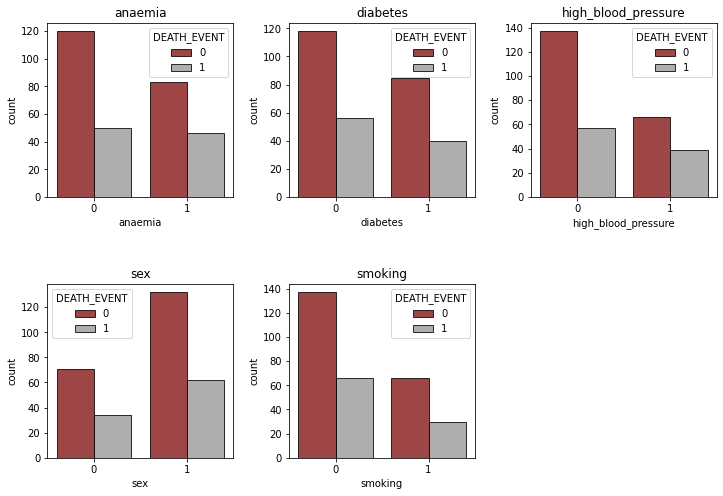

In [17]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

As part of EDA let Standardize all the numerical features we have 

In [18]:
from sklearn.preprocessing import StandardScaler

copy hf to other DataFrame

In [19]:
hf_norm = hf.copy()

In [20]:
for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])